## Getting Data

In [1]:
import pandas as pd
import random

In [2]:
# Dataset source: https://huggingface.co/datasets/ronaldahmed/scitechnews
df_train = pd.read_json('data/train.json', lines=True)
df_train

,id,pr-title,pr-article,pr-summary,sc-title,sc-abstract,sc-section_names,sc-sections,sc-article,sc-authors
0,0,New York City's Vaccine Passport Plan Renews O...,When New York City announced on Tuesday that i...,New York's City's mandate that people must sho...,,,[],[],,[]
1,1,Facebook Disables Accounts Tied to NYU Researc...,Facebook Inc. has disabled the personal accoun...,Facebook has disabled the personal accounts of...,,,[],[],,[]
2,2,Teenage Girls in Northern Nigeria 'Open Their ...,"KANO, Nigeria, Aug 2 (Reuters) - Teenage girls...",The Kabara non-governmental organization (NGO)...,,,[],[],,[]
3,3,3D 'Heat Map' Animation Shows How Seizures Spr...,"For 29 years, from the time she was 12, Rashet...","University of California, San Francisco (UCSF)...",,,[],[],,[]
4,4,Endlessly Changing Playground Teaches AIs to M...,What did they learn? Some of DeepMind's XLand ...,Alphabet's DeepMind Technologies has developed...,,,[],[],,[]
...,...,...,...,...,...,...,...,...,...,...
26633,29065,Young People Get Their Knowledge of Tech From ...,,"A survey of 1,000 16- to 21-year-olds in the U...",,,[],[],,[]
26634,29067,TUM Team ASIC Implements Post-Quantum Cryptogr...,,A team of researchers at Germany's Technical U...,,,[],[],,[]
26635,29070,3D Concrete Printing Robots Cut Rail Construct...,,Britain will employ robotic three-dimensionall...,,,[],[],,[]
26636,6496,'Listening' Drone Helps Find Victims Needing R...,As part of the ImPACT Tough Robotics Challenge...,Researchers in Japan say they have developed t...,,,[],[],,[]


In [3]:
df_train = df_train[['pr-title', 'pr-article']]
df_train

,pr-title,pr-article
0,New York City's Vaccine Passport Plan Renews O...,When New York City announced on Tuesday that i...
1,Facebook Disables Accounts Tied to NYU Researc...,Facebook Inc. has disabled the personal accoun...
2,Teenage Girls in Northern Nigeria 'Open Their ...,"KANO, Nigeria, Aug 2 (Reuters) - Teenage girls..."
3,3D 'Heat Map' Animation Shows How Seizures Spr...,"For 29 years, from the time she was 12, Rashet..."
4,Endlessly Changing Playground Teaches AIs to M...,What did they learn? Some of DeepMind's XLand ...
...,...,...
26633,Young People Get Their Knowledge of Tech From ...,
26634,TUM Team ASIC Implements Post-Quantum Cryptogr...,
26635,3D Concrete Printing Robots Cut Rail Construct...,
26636,'Listening' Drone Helps Find Victims Needing R...,As part of the ImPACT Tough Robotics Challenge...


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26638 entries, 0 to 26637
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   pr-title    26638 non-null  object
 1   pr-article  26638 non-null  object
dtypes: object(2)
memory usage: 416.3+ KB


In [5]:
df_train = df_train[df_train['pr-article'] != '']
print('Train dataframe size without blanks: ', len(df_train))

Train dataframe size without blanks:  12735


In [6]:
random_idx = random.randint(0, len(df_train))
row = df_train.iloc[random_idx]
print('News example: ', random_idx)
print('Title:    \n', row['pr-title'])
print('Article:  \n', row['pr-article'])

News example:  11203
Title:    
 RIT Scientists Use Supercomputers to 'See' Black Holes
Article:  
 RIT joined the William Warfield Scholarship Fund, The Eastman School of Music of the University of Rochester, and the City of Rochester in a collective celebration earlier this week honoring iconic performer and trailblazer William Warfield with a bronze sculpture.


In [7]:
df_valid = pd.read_json('data/valid.json', lines=True)
df_valid = df_valid[['pr-title', 'pr-article']]

df_test = pd.read_json('data/test.json', lines=True)
df_test = df_test[['pr-title', 'pr-article']]

print('Valid dataframe size: ', len(df_valid))
print('Test dataframe size:  ', len(df_test))

Valid dataframe size:  1431
Test dataframe size:   1000


In [8]:
df_valid = df_valid[df_valid['pr-article'] != '']
df_valid = df_valid[df_valid['pr-title'] != '']
print('Valid dataframe size without blanks: ', len(df_valid))
print('Test dataframe size without blanks:  ', len(df_test))

Valid dataframe size without blanks:  1405
Test dataframe size without blanks:   1000


In [9]:
import matplotlib.pyplot as plt

(0.0, 1024.0)

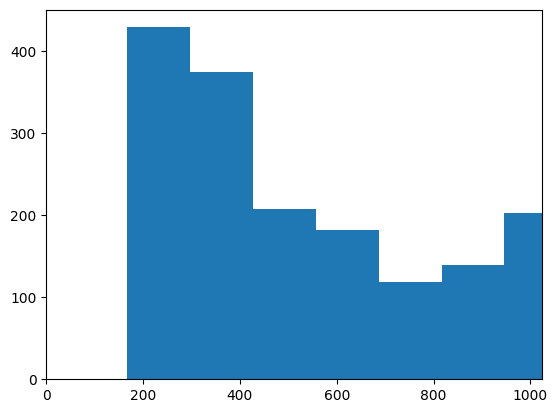

In [10]:
article_lengths = df_train['pr-article'].str.len()

plt.hist(article_lengths, bins=500)
plt.xlim(0, 1024)

## Tokenizing and preprocessing data

In [11]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, Seq2SeqTrainingArguments
from datasets import Dataset
import evaluate

# Prepare the data
def preprocess_data(df):
    return Dataset.from_pandas(df.rename(columns={"pr-article": "input_text", "pr-title": "target_text"}))

train_data = preprocess_data(df_train)
valid_data = preprocess_data(df_valid)

In [12]:
# Tokenizer and model (requieres sentencepiece)
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")

def tokenize_data(example):
    input_encoding = tokenizer(
        example["input_text"], truncation=True, padding="max_length", max_length=512 # truncate articles to 512 tokens
    )
    target_encoding = tokenizer(
        example["target_text"], truncation=True, padding="max_length", max_length=64 # truncate titles to 64 tokens
    )
    return {
        "input_ids": input_encoding["input_ids"],
        "attention_mask": input_encoding["attention_mask"],
        "labels": target_encoding["input_ids"],
    }

train_data = train_data.map(tokenize_data, batched=True)
valid_data = valid_data.map(tokenize_data, batched=True)

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Map:   0%|          | 0/12735 [00:00<?, ? examples/s]

Map:   0%|          | 0/1405 [00:00<?, ? examples/s]

## Selecting metric for out task

Generating titles from article content is a text2text generation task, where input text (the article) produces output text (the title). Similar tasks include machine translation, evaluated with BLEU for word precision, and text summarization, evaluated with **ROUGE** for word recall. Title generation is closely related to summarization, as titles should convey the article's essence while sparking curiosity. Therefore, the ROUGE score is used to evaluate title generation models.